In [1]:
import sys
import cv2
import numpy as np
import math
import pytesseract
import pyautogui
import matplotlib.pyplot as plt

In [2]:

def get_red(img):
    redImg = img[:,:,2]
    return redImg

def get_green(img):
    greenImg = img[:,:,1]
    return greenImg

def get_blue(img):
    blueImg = img[:,:,0]
    return blueImg

#img = cv2.imread(imagepath)
#b, g, r = cv2.split(img)
#cv2.imshow("Blue 1", b)
#cv2.imshow("Green 1", g)
#cv2.imshow("Red 1", r)

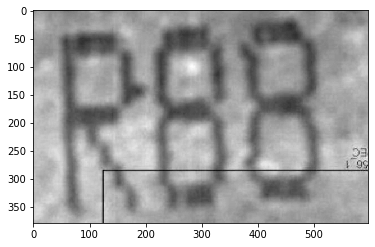

In [5]:
imagepath = 'OCR.jpg'

#read gray image
im = cv2.imread(imagepath,0) 

plt.imshow(im, cmap='gray')

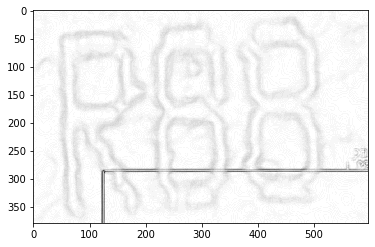

In [6]:
im = cv2.fastNlMeansDenoising(im,None,10,7,21)
median = cv2.medianBlur(im, 5)
kernel_size = 3
im = cv2.GaussianBlur(median,(kernel_size, kernel_size), 0)

kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
dilate=cv2.dilate(im,kernel)
erode=cv2.erode(im,kernel)
image=cv2.absdiff(dilate,erode)
image=cv2.bitwise_not(image)

plt.imshow(image, cmap='gray')

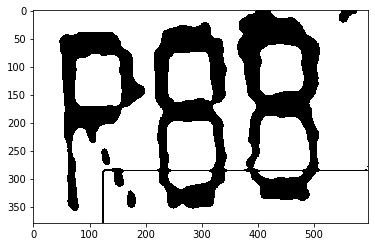

In [7]:
ret, th = cv2.threshold( image, 254, 255, cv2.THRESH_BINARY )
#ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

ret,im = cv2.threshold(im, 130, 255,cv2.THRESH_BINARY)

plt.imshow(im, cmap='gray')

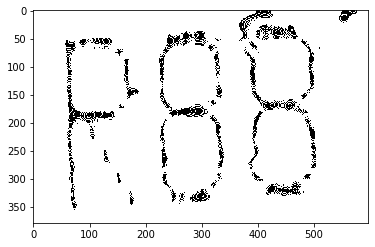

In [8]:
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        if th[i][j] == 0:
            im[i][j] = 255

plt.imshow(im, cmap='gray')

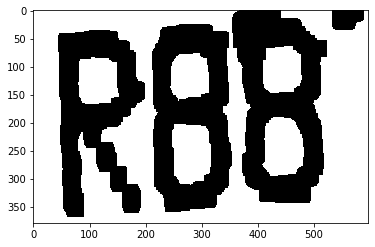

In [9]:
im = cv2.Canny(im, 30, 100, apertureSize = 5)
im = cv2.dilate(im,cv2.getStructuringElement(cv2.MORPH_RECT,(25,25)))
im = cv2.bitwise_not(im)

plt.imshow(im, cmap='gray')

In [10]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe' 
text = pytesseract.image_to_string(im, config="--psm 13")
print(text)

R88

